In [40]:
from sklearn import model_selection
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR


In [41]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v4.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,Aviso bebida últimos 12M,Dirigir embriagado nos últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,...,Diagnóstico de outras doenças mentais,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo,Alcoolismo e Depressão
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,2.0,0.0,12.0,1.0,1.0,2.0,1.0,2.0,...,2.0,0.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,2.0,0.0,10.0,1.0,1.0,2.0,1.0,2.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [42]:
# Função para normalizar usando Min-Max
def minmax_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

# Aplicando a normalização Min-Max ao DataFrame
df = minmax_scaling(df)

In [43]:
df

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,Aviso bebida últimos 12M,Dirigir embriagado nos últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,...,Diagnóstico de outras doenças mentais,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo,Alcoolismo e Depressão
0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.00,0.000000,0.5,0.000000,0.285714,0.2,0.333333,1.0,0.2,1.0,...,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.00,0.000000,0.5,0.000000,0.238095,0.2,0.333333,1.0,0.2,1.0,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,0.00,0.333333,1.0,0.571429,0.119048,0.2,0.333333,0.5,0.4,0.5,...,1.0,0.000000,0.333333,0.333333,0.000000,0.000000,0.0,1.0,1.0,1.0
1610,0.75,0.666667,1.0,0.000000,0.119048,0.2,0.333333,0.0,0.2,0.5,...,0.0,0.000000,1.000000,1.000000,1.000000,0.333333,0.0,1.0,1.0,1.0
1611,0.00,0.000000,1.0,0.000000,0.238095,0.2,0.333333,1.0,0.2,1.0,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,1.0
1612,0.25,0.333333,1.0,0.142857,0.142857,0.2,0.333333,0.5,0.2,0.5,...,0.0,0.000000,0.333333,0.000000,0.333333,0.333333,0.0,1.0,1.0,1.0


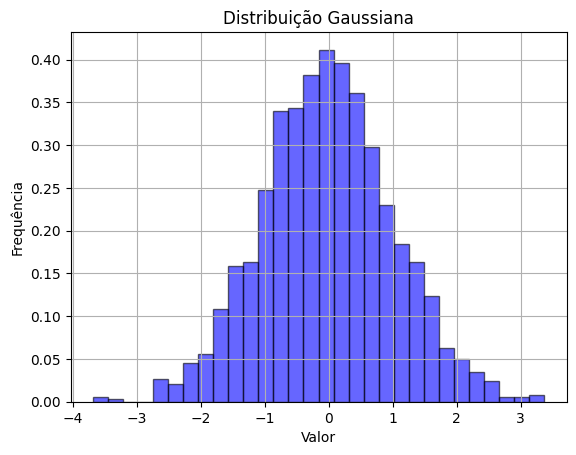

In [44]:
# Parâmetros da distribuição gaussiana
mu = 0  # Média
sigma = 1  # Desvio padrão
tamanho_amostra = len(df)  # Tamanho da amostra

# Gerar dados normalmente distribuídos
dados = np.random.normal(mu, sigma, tamanho_amostra)

# Traçar um histograma para visualizar a distribuição
plt.hist(dados, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Distribuição Gaussiana')
plt.grid(True)
plt.show()

In [45]:
#Randomizando os dados do Dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

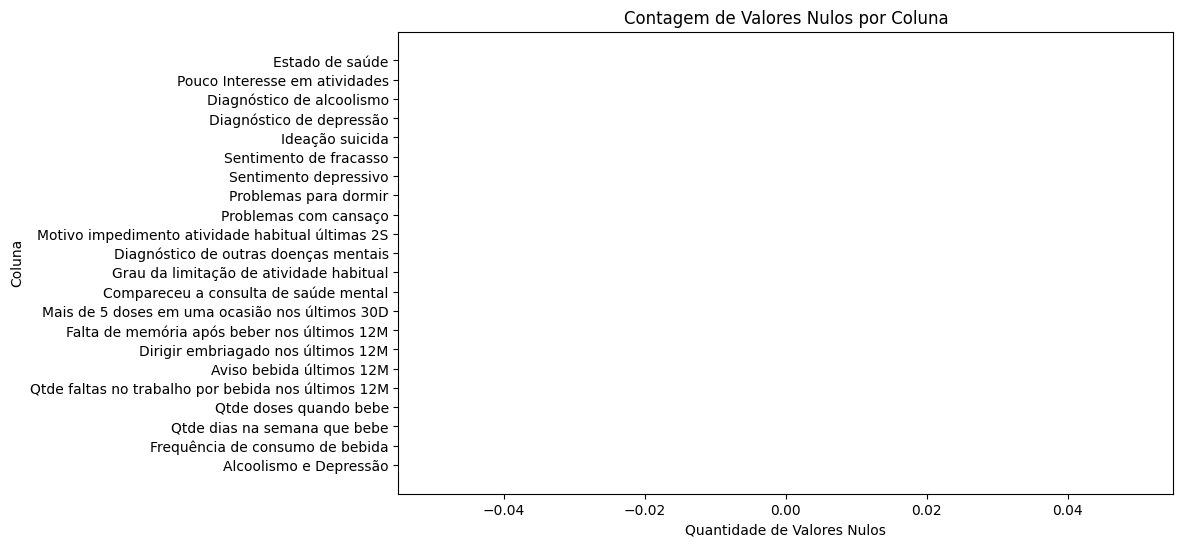

In [46]:
# Suponha que você já tenha executado df.isnull().sum()
null_counts = df.isnull().sum()

# Crie um DataFrame com as contagens de valores nulos
null_counts_df = pd.DataFrame({'Coluna': null_counts.index, 'Valores Nulos': null_counts.values})

# Ordene o DataFrame por contagem de valores nulos (opcional)
null_counts_df = null_counts_df.sort_values(by='Valores Nulos', ascending=False)

# Plote o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(null_counts_df['Coluna'], null_counts_df['Valores Nulos'], color='skyblue')
plt.xlabel('Quantidade de Valores Nulos')
plt.ylabel('Coluna')
plt.title('Contagem de Valores Nulos por Coluna')
plt.gca().invert_yaxis()  # Inverte a ordem das colunas para a mais alta no topo
plt.show()

In [47]:
# array = df.values
# array
# X = array[:,0:len(df.columns)-1]
# Y = array[:,len(df.columns)-1]

X = df.drop(columns=["Alcoolismo e Depressão", "Diagnóstico de depressão"], axis=1)
Y = df["Alcoolismo e Depressão"]


print("X:", len(X), "Y:", len(Y))

X: 1614 Y: 1614


In [48]:
test_size = 0.4 # Tamanho do conjunto de teste
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state=seed)

Support Vector Regression

In [49]:
# Criar uma instância do modelo SVR com kernel rbf
svr = SVR(kernel='rbf')

# Realizar a validação cruzada (por exemplo, com 5-fold)
cv_scores = cross_val_score(svr, X, Y, cv=5, scoring='neg_mean_absolute_error')

# Calcular a média dos scores e inverter o sinal (porque a função de scoring retorna negativo)
mean_cv_score = -np.mean(cv_scores)

# Exibir a média do erro absoluto médio (MAE) da validação cruzada
print("Média do Erro Absoluto Médio (MAE) da validação cruzada:", mean_cv_score)


Média do Erro Absoluto Médio (MAE) da validação cruzada: 0.05402230994854122


Erro Absoluto Médio (MAE) nos dados de teste: 0.05579798991377215


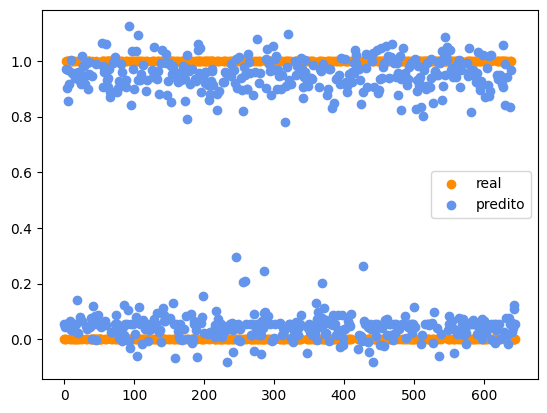

In [50]:
# Treinar o modelo SVR com seus dados de treinamento
svr.fit(X_train, Y_train)

# Fazer previsões com o modelo treinado
y_pred_svr = svr.predict(X_test)

# Calcular o erro médio absoluto (MAE) nos dados de teste
mae = mean_absolute_error(Y_test, y_pred_svr)

# Exibir o MAE nos dados de teste
print("Erro Absoluto Médio (MAE) nos dados de teste:", mae)

# Plotar os resultados
plt.scatter(range(len(Y_test)), Y_test, color='darkorange', label='real')
plt.scatter(range(len(y_pred_svr)), y_pred_svr, color='cornflowerblue', label='predito')
plt.legend()
plt.show()

In [51]:
mae = mean_absolute_error(Y_test, y_pred_svr)
mse = mean_squared_error(Y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred_svr)

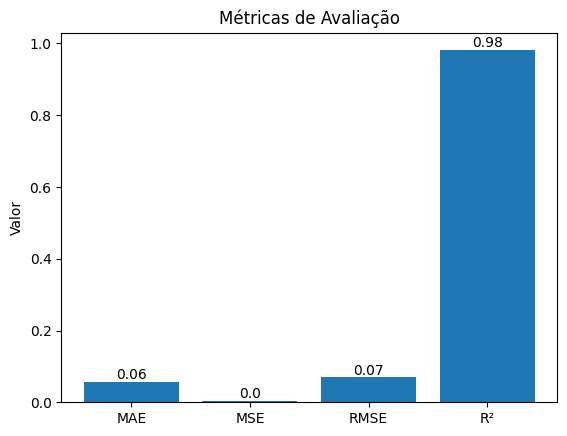

In [52]:
# Criar um gráfico de barras para as métricas
metrics_names = ['MAE', 'MSE', 'RMSE', 'R²']
metrics_values = [mae, mse, rmse, r2]

plt.bar(metrics_names, metrics_values)
plt.ylabel('Valor')
plt.title('Métricas de Avaliação')

# Adicionar rótulos de dados para cada coluna
for i, v in enumerate(metrics_values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()